In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import linear_model
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
import numpy as np
from sklearn.preprocessing import MinMaxScaler

import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/study case kebotakan/Case Study Chapter 3 Topic 3: Dataset Kebotakan (Not Clean).csv')

In [ ]:
df_train.head()

,umur,jenis_kelamin,pekerjaan,provinsi,gaji,is_menikah,is_keturunan,berat,tinggi,sampo,is_merokok,pendidikan,stress,botak_prob
0,27.0,Perempuan,PNS,Bengkulu,7.957453e+06,1.0,0.0,54.315053,170.428542,Pantone,1.0,S1,5.0,0.605974
1,53.0,Perempuan,PNS,Bandung,7.633003e+06,1.0,0.0,72.873404,165.530097,Pantone,0.0,S1,7.0,0.532860
2,37.0,Perempuan,Pegawai swasta,Bandung,6.637625e+06,1.0,0.0,46.321533,154.599388,Moonsilk,0.0,S1,4.0,0.418442
3,36.0,Perempuan,Pengangguran,Palu,3.624871e+06,1.0,0.0,51.539781,167.340481,Deadbuoy,1.0,SD,9.0,0.804050
4,38.0,Laki-laki,Freelance,Palangkaraya,6.031808e+06,1.0,0.0,60.726909,165.514773,Merpati,1.0,S2,1.0,0.368371


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7917 entries, 0 to 7916
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   umur           7832 non-null   float64
 1   jenis_kelamin  7840 non-null   object 
 2   pekerjaan      7760 non-null   object 
 3   provinsi       7831 non-null   object 
 4   gaji           7843 non-null   float64
 5   is_menikah     7845 non-null   float64
 6   is_keturunan   7828 non-null   float64
 7   berat          7861 non-null   float64
 8   tinggi         7843 non-null   float64
 9   sampo          7858 non-null   object 
 10  is_merokok     7847 non-null   float64
 11  pendidikan     7847 non-null   object 
 12  stress         7853 non-null   float64
 13  botak_prob     7838 non-null   float64
dtypes: float64(9), object(5)
memory usage: 866.0+ KB


In [ ]:
for col in df_train.columns:
  print(df_train[col].value_counts())
  print(' ')

37.0    366
41.0    328
35.0    318
38.0    312
40.0    308
       ... 
8.0       1
74.0      1
77.0      1
2.0       1
73.0      1
Name: umur, Length: 71, dtype: int64
 
Laki-laki    5367
Perempuan    2473
Name: jenis_kelamin, dtype: int64
 
Pegawai swasta    3160
PNS               3108
Freelance         1160
Pengangguran       332
Name: pekerjaan, dtype: int64
 
Kupang            261
Tanjungselor      252
Bengkulu          249
Denpasar          246
Banjarmasin       245
Makassar          244
Gorontalo         240
Semarang          238
Jayapura          237
Mamuju            237
Mataram           237
Ambon             234
Manado            233
Kendari           233
Tanjung Pinang    233
Jakarta           232
Serang            231
Pangkalpinang     229
Pontianak         229
Manokwari         228
Pekanbaru         226
Samarinda         225
Jambi             224
Yogyakarta        223
Banda Aceh        223
Banda Lampung     222
Medan             221
Palangkaraya      220
Palu             

In [ ]:
df_train.isna().sum()

umur              85
jenis_kelamin     77
pekerjaan        157
provinsi          86
gaji              74
is_menikah        72
is_keturunan      89
berat             56
tinggi            74
sampo             59
is_merokok        70
pendidikan        70
stress            64
botak_prob        79
dtype: int64

In [ ]:
df_train.duplicated().sum()

82

In [ ]:
# menghilangkan missing value
df_train['umur'] = df_train['umur'].fillna(0)
df_train['jenis_kelamin'] = df_train['jenis_kelamin'].fillna('Tidak Diketahui')
df_train['pekerjaan'] = df_train['pekerjaan'].fillna('Tidak Diketahui')
df_train['provinsi'] = df_train['provinsi'].fillna('Tidak Diketahui')
df_train['gaji'] = df_train['gaji'].fillna(0)
# angka 2 untuk menggantikan arti dari 'tidak diketahui'
df_train['is_menikah'] = df_train['is_menikah'].fillna(2)
df_train['is_keturunan'] = df_train['is_keturunan'].fillna(2)
df_train['berat'] = df_train['berat'].fillna(0)
df_train['tinggi'] = df_train['tinggi'].fillna(0)
df_train['sampo'] = df_train['sampo'].fillna('Tidak Diketahui')
df_train['is_merokok'] = df_train['is_merokok'].fillna(2)
df_train['pendidikan'] = df_train['pendidikan'].fillna('Tidak Diketahui')
df_train['stress'] = df_train['stress'].fillna(0)
df_train['botak_prob'] = df_train['botak_prob'].fillna(0)

In [ ]:
df_train.isna().sum()

umur             0
jenis_kelamin    0
pekerjaan        0
provinsi         0
gaji             0
is_menikah       0
is_keturunan     0
berat            0
tinggi           0
sampo            0
is_merokok       0
pendidikan       0
stress           0
botak_prob       0
dtype: int64

In [ ]:
df_train

,umur,jenis_kelamin,pekerjaan,provinsi,gaji,is_menikah,is_keturunan,berat,tinggi,sampo,is_merokok,pendidikan,stress,botak_prob
0,27.0,Perempuan,PNS,Bengkulu,7.957453e+06,1.0,0.0,54.315053,170.428542,Pantone,1.0,S1,5.0,0.605974
1,53.0,Perempuan,PNS,Bandung,7.633003e+06,1.0,0.0,72.873404,165.530097,Pantone,0.0,S1,7.0,0.532860
2,37.0,Perempuan,Pegawai swasta,Bandung,6.637625e+06,1.0,0.0,46.321533,154.599388,Moonsilk,0.0,S1,4.0,0.418442
3,36.0,Perempuan,Pengangguran,Palu,3.624871e+06,1.0,0.0,51.539781,167.340481,Deadbuoy,1.0,SD,9.0,0.804050
4,38.0,Laki-laki,Freelance,Palangkaraya,6.031808e+06,1.0,0.0,60.726909,165.514773,Merpati,1.0,S2,1.0,0.368371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7912,32.0,Laki-laki,Pegawai swasta,Yogyakarta,6.024409e+06,1.0,0.0,44.432438,154.578859,Deadbuoy,0.0,SMA,9.0,0.471229
7913,34.0,Laki-laki,Pegawai swasta,Manado,1.007043e+07,1.0,0.0,49.389914,158.782726,Shoulder & Head,1.0,S1,9.0,0.543821
7914,58.0,Laki-laki,Freelance,Mamuju,8.010815e+06,1.0,0.0,54.351968,154.478087,Deadbuoy,1.0,S2,6.0,0.643453
7915,30.0,Tidak Diketahui,PNS,Palu,9.059906e+06,1.0,0.0,57.646930,163.377717,Deadbuoy,0.0,S1,10.0,0.540056


In [ ]:
df_train = df_train.drop_duplicates()

In [ ]:
df_train.duplicated().sum()

0

In [ ]:
df_train['gaji'] = df_train['gaji'].round(0)
df_train['berat'] = df_train['berat'].round(0)
df_train['tinggi'] = df_train['tinggi'].round(0)

<ipython-input-13-fe79c90bbca8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['gaji'] = df_train['gaji'].round(0)
<ipython-input-13-fe79c90bbca8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['berat'] = df_train['berat'].round(0)
<ipython-input-13-fe79c90bbca8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [ ]:
df_train

,umur,jenis_kelamin,pekerjaan,provinsi,gaji,is_menikah,is_keturunan,berat,tinggi,sampo,is_merokok,pendidikan,stress,botak_prob
0,27.0,Perempuan,PNS,Bengkulu,7957453.0,1.0,0.0,54.0,170.0,Pantone,1.0,S1,5.0,0.605974
1,53.0,Perempuan,PNS,Bandung,7633003.0,1.0,0.0,73.0,166.0,Pantone,0.0,S1,7.0,0.532860
2,37.0,Perempuan,Pegawai swasta,Bandung,6637625.0,1.0,0.0,46.0,155.0,Moonsilk,0.0,S1,4.0,0.418442
3,36.0,Perempuan,Pengangguran,Palu,3624871.0,1.0,0.0,52.0,167.0,Deadbuoy,1.0,SD,9.0,0.804050
4,38.0,Laki-laki,Freelance,Palangkaraya,6031808.0,1.0,0.0,61.0,166.0,Merpati,1.0,S2,1.0,0.368371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7830,52.0,Laki-laki,PNS,Manokwari,4286318.0,1.0,0.0,47.0,170.0,Deadbuoy,1.0,SMA,2.0,0.773141
7831,45.0,Laki-laki,PNS,Tanjungselor,8646146.0,1.0,0.0,54.0,170.0,Pantone,0.0,S1,2.0,0.604058
7832,24.0,Laki-laki,PNS,Jambi,6850066.0,1.0,0.0,64.0,161.0,Moonsilk,0.0,SMA,8.0,0.502413
7833,29.0,Laki-laki,Pegawai swasta,Palangkaraya,12049603.0,1.0,0.0,55.0,180.0,Pantone,1.0,SMA,6.0,0.562664


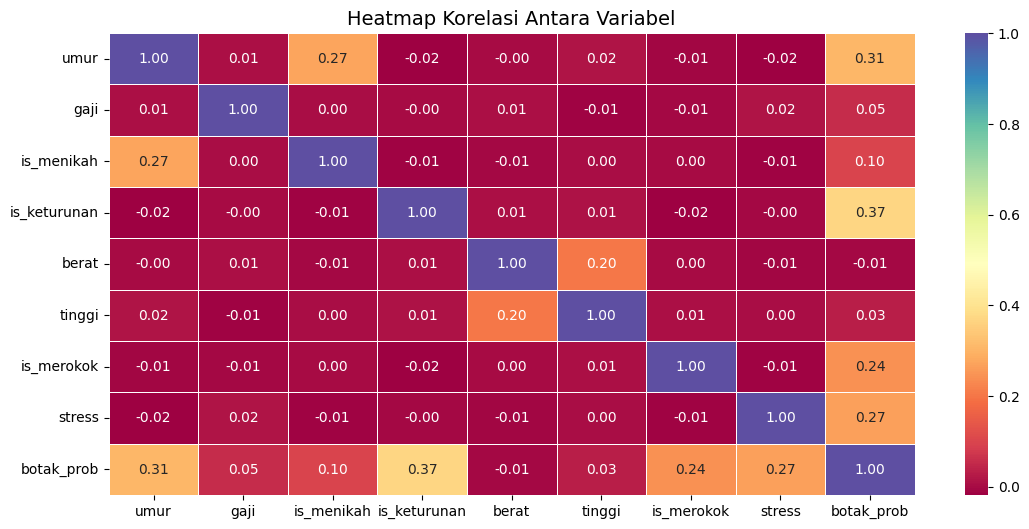

In [ ]:
plt.figure(figsize=(13, 6))
ax = sns.heatmap(df_train.corr(), cmap='Spectral', annot=True, fmt='.2f', linewidths=0.5)
ax.set_title('Heatmap Korelasi Antara Variabel', fontsize=14)
plt.show()

In [ ]:
numeric_data = df_train.select_dtypes(include=[np.number]).columns
numeric_data

Index(['umur', 'gaji', 'is_menikah', 'is_keturunan', 'berat', 'tinggi',
       'is_merokok', 'stress', 'botak_prob'],
      dtype='object')

In [ ]:
categorical_data = df_train.select_dtypes(exclude=[np.number]).columns
categorical_data

Index(['jenis_kelamin', 'pekerjaan', 'provinsi', 'sampo', 'pendidikan'], dtype='object')

In [ ]:
df_train.describe()

,umur,gaji,is_menikah,is_keturunan,berat,tinggi,is_merokok,stress,botak_prob
count,7835.000000,7.835000e+03,7835.00000,7835.000000,7835.000000,7835.000000,7835.000000,7835.000000,7835.000000
mean,39.061646,8.759622e+06,0.98813,0.225144,55.553797,165.654116,0.511295,5.406382,0.568050
std,10.648905,4.544040e+06,0.17205,0.443782,10.655980,19.501807,0.517223,2.893393,0.181817
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,5.674834e+06,1.00000,0.000000,49.000000,160.000000,0.000000,3.000000,0.448315
50%,39.000000,7.794452e+06,1.00000,0.000000,54.000000,167.000000,1.000000,5.000000,0.565710
75%,46.000000,1.077803e+07,1.00000,0.000000,60.000000,174.000000,1.000000,8.000000,0.685767
max,77.000000,5.000000e+07,2.00000,2.000000,150.000000,226.000000,2.000000,10.000000,1.000000


In [ ]:
EN = LabelEncoder()

df_train['jenis_kelamin'] = EN.fit_transform(df_train['jenis_kelamin'])

df_train['pekerjaan'] = EN.fit_transform(df_train['pekerjaan'])

df_train['provinsi'] = EN.fit_transform(df_train['provinsi'])

df_train['sampo'] = EN.fit_transform(df_train['sampo'])

df_train['pendidikan'] = EN.fit_transform(df_train['pendidikan'])

<ipython-input-19-6051464e1c04>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['jenis_kelamin'] = EN.fit_transform(df_train['jenis_kelamin'])
<ipython-input-19-6051464e1c04>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['pekerjaan'] = EN.fit_transform(df_train['pekerjaan'])
<ipython-input-19-6051464e1c04>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
numeric_data = ['umur', 'gaji', 'is_menikah', 'is_keturunan', 'berat', 'tinggi',
       'is_merokok', 'stress', 'botak_prob']

In [ ]:
df_train

,umur,jenis_kelamin,pekerjaan,provinsi,gaji,is_menikah,is_keturunan,berat,tinggi,sampo,is_merokok,pendidikan,stress,botak_prob
0,27.0,1,1,5,7957453.0,1.0,0.0,54.0,170.0,3,1.0,0,5.0,0.605974
1,53.0,1,1,3,7633003.0,1.0,0.0,73.0,166.0,3,0.0,0,7.0,0.532860
2,37.0,1,2,3,6637625.0,1.0,0.0,46.0,155.0,2,0.0,0,4.0,0.418442
3,36.0,1,3,22,3624871.0,1.0,0.0,52.0,167.0,0,1.0,3,9.0,0.804050
4,38.0,0,0,20,6031808.0,1.0,0.0,61.0,166.0,1,1.0,1,1.0,0.368371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7830,52.0,0,1,16,4286318.0,1.0,0.0,47.0,170.0,0,1.0,4,2.0,0.773141
7831,45.0,0,1,32,8646146.0,1.0,0.0,54.0,170.0,3,0.0,0,2.0,0.604058
7832,24.0,0,1,9,6850066.0,1.0,0.0,64.0,161.0,2,0.0,4,8.0,0.502413
7833,29.0,0,2,20,12049603.0,1.0,0.0,55.0,180.0,3,1.0,4,6.0,0.562664


In [ ]:
df_train.isna().sum()

umur             0
jenis_kelamin    0
pekerjaan        0
provinsi         0
gaji             0
is_menikah       0
is_keturunan     0
berat            0
tinggi           0
sampo            0
is_merokok       0
pendidikan       0
stress           0
botak_prob       0
dtype: int64

In [ ]:
X = df_train.drop(['botak_prob'], axis = 1)
y = df_train['botak_prob']

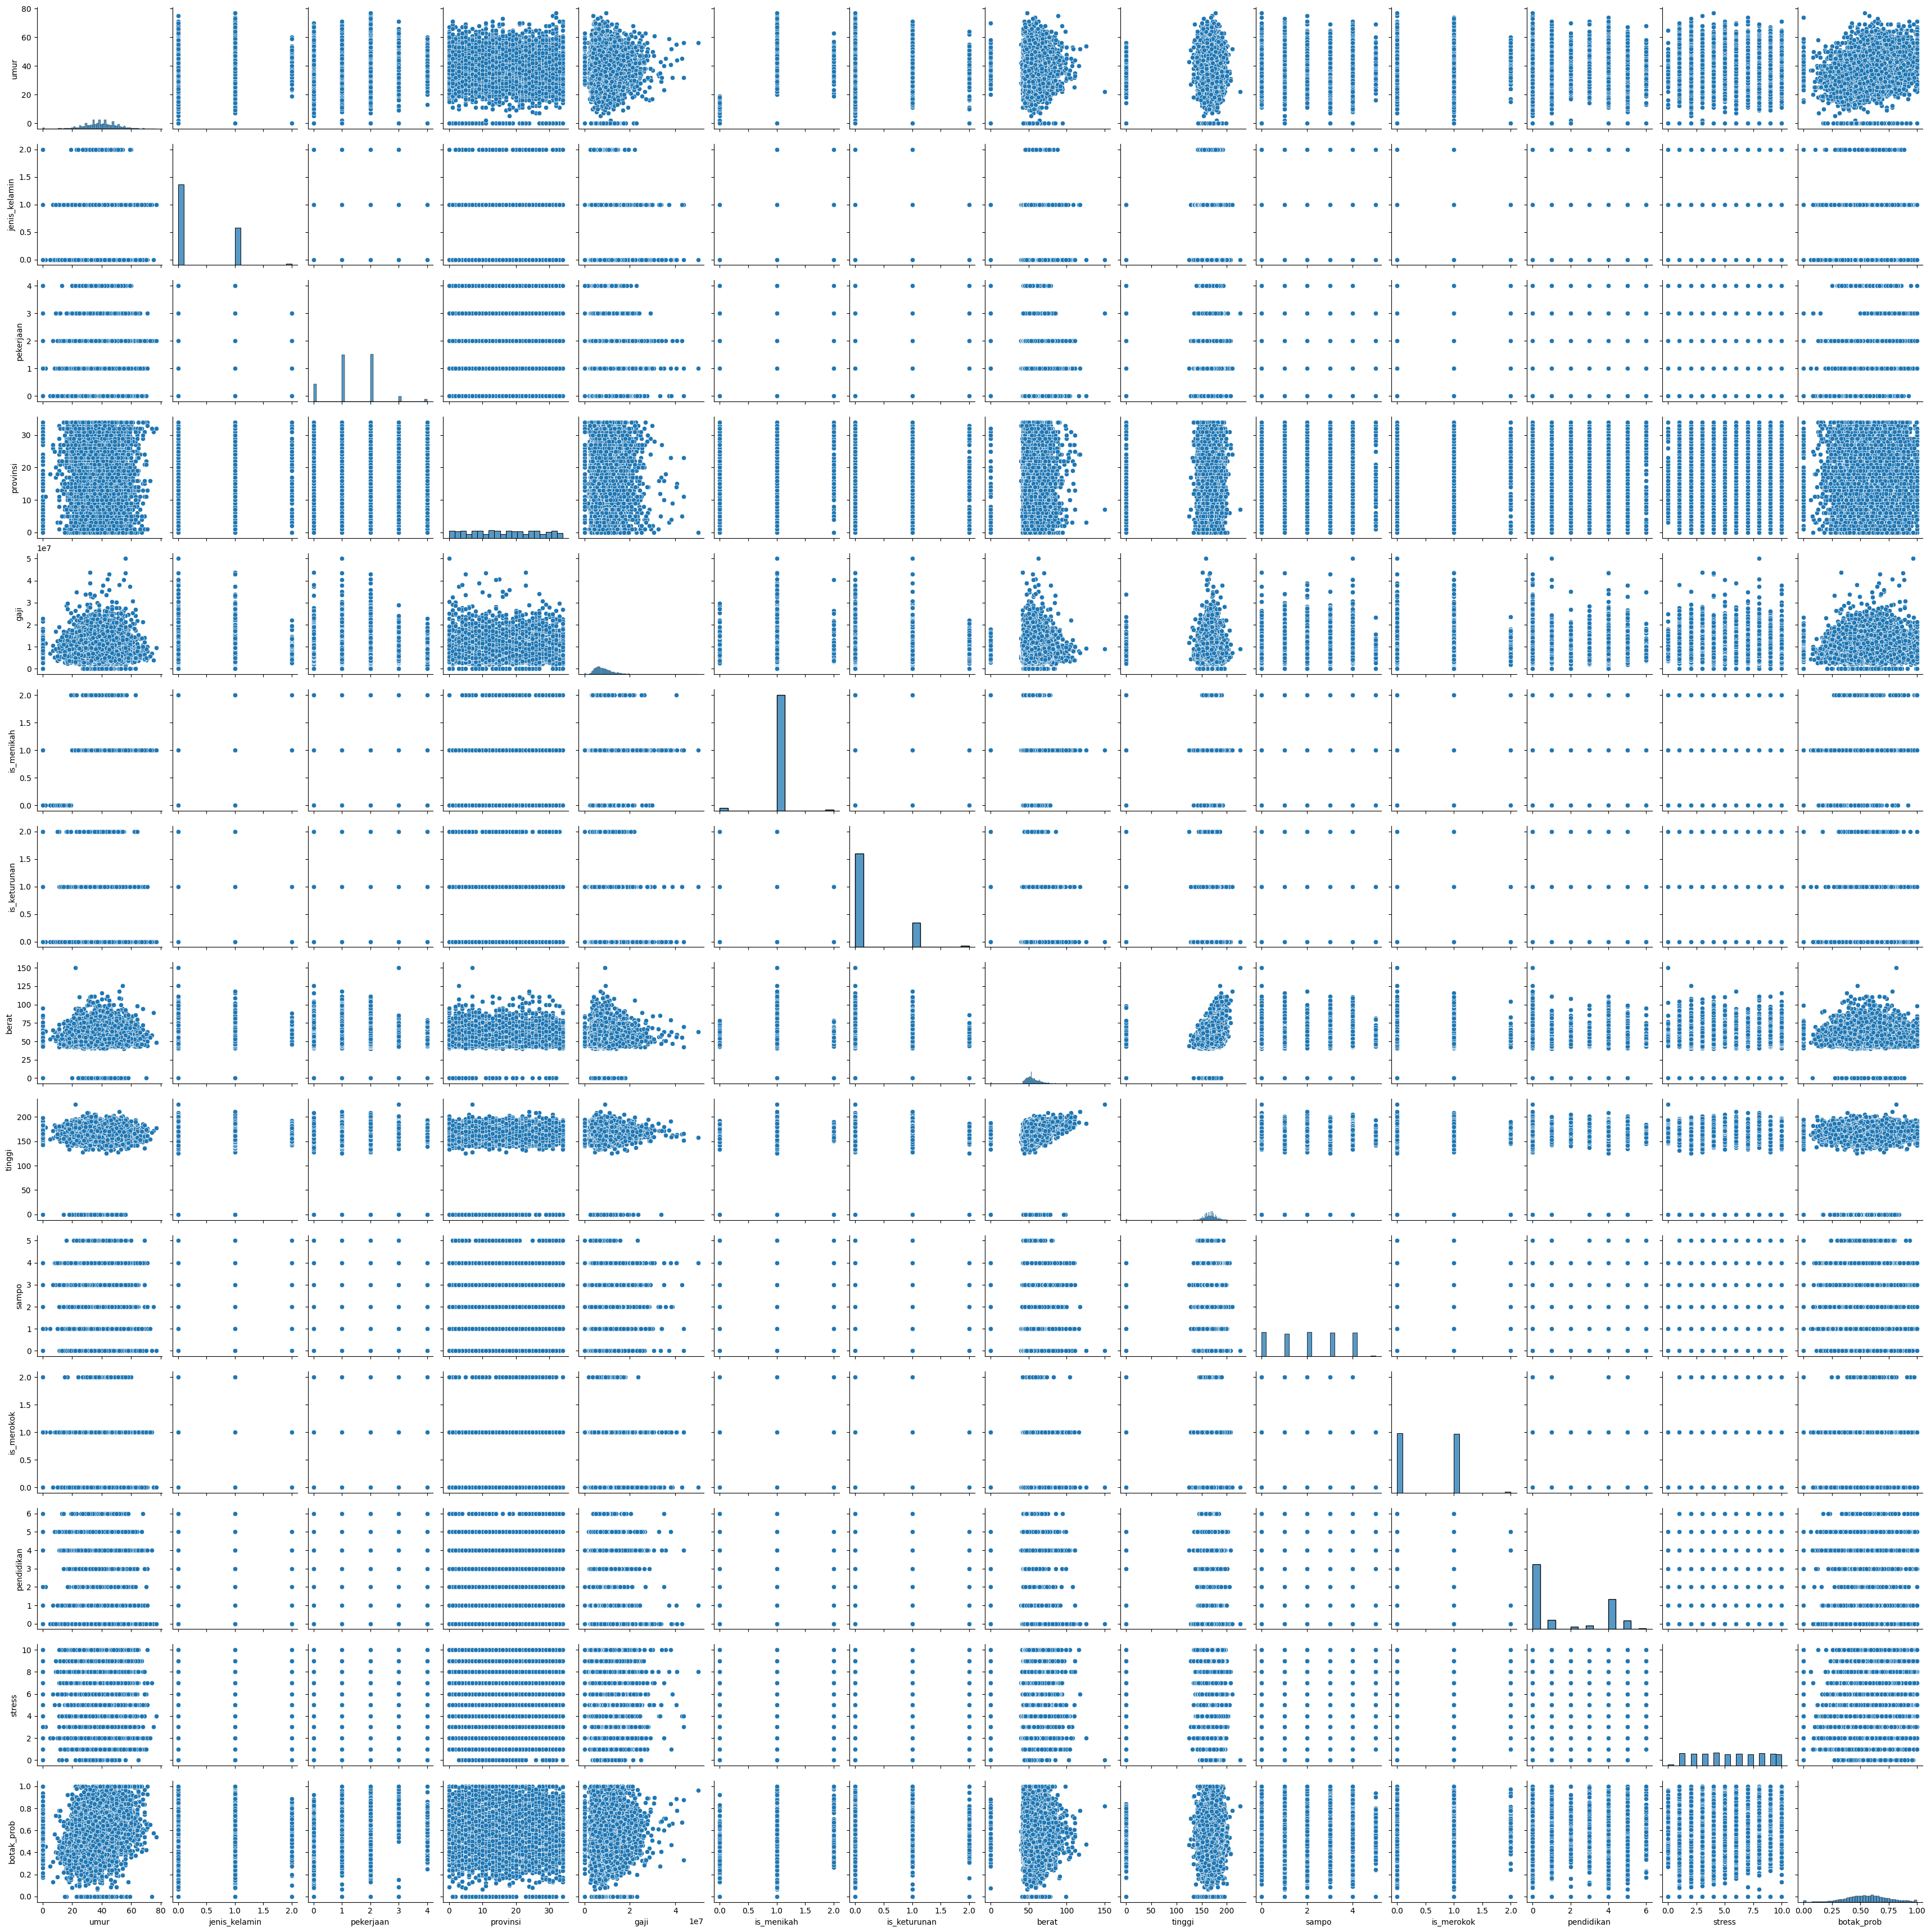

In [ ]:
# data plot
sns.pairplot(df_train)

In [ ]:
X.shape

(7835, 13)

In [ ]:
y.shape

(7835,)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
xgb = XGBRegressor()

In [ ]:
param_dist = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'n_estimators': [100, 200, 300, 400, 500],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 1, 2, 3, 4, 5]
}


In [ ]:
#eval_metric = 'rmse'
xgb_random = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    cv=5,
    n_iter=50,
    n_jobs=-1,
    verbose=1,
    random_state=42
)


In [ ]:
xgb_random.fit(X_train, y_train)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8, 0.9,
                                                             1.0],
                                        'gamma': [0, 1, 2, 3, 4, 5],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2,
                                                          0.3],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]},
                   random_state=42, verbose=1)

In [ ]:
print('Best hyperparameters:', xgb_random.best_params_)

Best hyperparameters: {'subsample': 0.9, 'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 1.0}


In [ ]:
xgb_REG_best = XGBRegressor(subsample = 0.9, n_estimators = 200, max_depth = 4, learning_rate = 0.05, gamma = 0, colsample_bytree =  1.0)

In [ ]:
xgb_REG_best.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
y_pred = xgb_REG_best.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MSE:', mse)
print('R2:', r2)

MSE: 0.008671424782519048
R2: 0.7532776341343995
